In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
import seaborn as sns

In [61]:
# First cleaned content dataset
contentcsv = pd.read_csv("Cleaned content.csv",index_col=0)
contentcsv.head(4)

,Content ID,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology


In [62]:
# cleaned Reaction dataset
reactioncsv = pd.read_csv("cleaned Reaction.csv",index_col=0)
reactioncsv.head()

,Content ID,Reaction Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [63]:
# cleaned Reactiontypes data set
rtcsv = pd.read_csv(r"cleaned ReactionTypes.csv",index_col=0)
rtcsv.head()

,Reaction Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


# Mearging the data sets

In [73]:
# merge reactioncsv and contentcsv table together
tb1 = reactioncsv.merge(contentcsv, on="Content ID")

# check the head
tb1.head()


,Content ID,Reaction Type,Datetime,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying


In [74]:
# merge tb1 together with rtcsv

final_table = tb1.merge(rtcsv, on="Reaction Type")

#check the head
final_table.head()

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,studying,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,healthy eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,healthy eating,negative,0


In [75]:
final_table.head()

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,studying,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,healthy eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,healthy eating,negative,0


In [81]:
# Let's see if we have any mising value while merging
final_table.isna().sum().sort_values()

Content ID       0
Reaction Type    0
Datetime         0
Content Type     0
Category         0
Sentiment        0
Score            0
dtype: int64

# Data Analysis 
 
 - Let's select our Top 5 Categories

In [89]:

selection= final_table.groupby("Category")["Score"].sum().sort_values(ascending = False)
selection = selection.reset_index(name='Score')

# check head of selection
selection.head()

,Category,Score
0,animals,74965
1,science,71168
2,healthy eating,69339
3,technology,68738
4,food,66676


In [91]:
selection.to_csv("Top_5_Categories.csv")


# Data Visualization

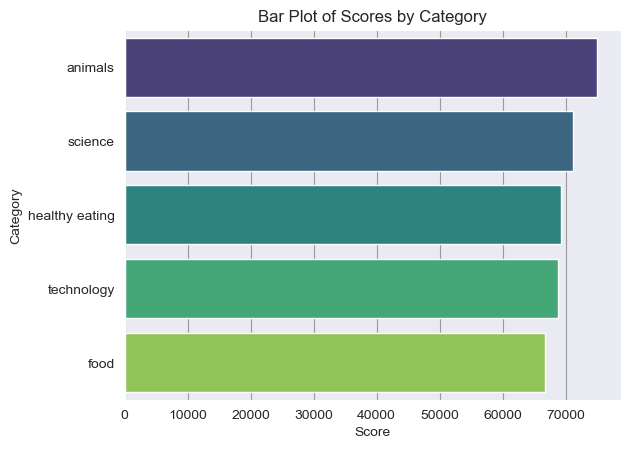

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Create a DataFrame from the provided data
data = {
    'Category': ['animals', 'science', 'healthy eating', 'technology', 'food'],
    'Score': [74965, 71168, 69339, 68738, 66676]
}
df = pd.DataFrame(data)

# Create bar plot using seaborn
sns.barplot(x="Score", y="Category, data=df, palette='viridis')

# Add labels and title
plt.xlabel('Score')
plt.ylabel('Category')
plt.title('Bar Plot of Scores by Category')

# Show plot
plt.show()


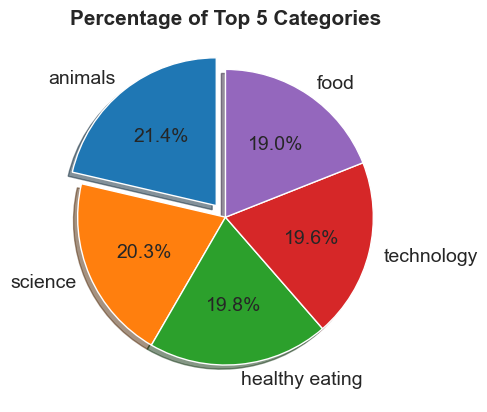

In [120]:
import matplotlib.pyplot as plt

# Define sizes and labels from the DataFrame
sizes = df["Score"]
labels = df["Category"]

# Define explode to have the same length as sizes
explode = [0.1 if i == 0 else 0 for i in range(len(sizes))]  # Explode only the first slice

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90, textprops={'fontsize': 14})
ax.set_title("Percentage of Top 5 Categories", fontdict={'size': 15, 'weight': "bold"})
plt.show()


# Insights
- Let's Answer the Following Questions ;

  - How many unique categories are there?
  - How many reactions are there to the most popular category?
  - What was the month with the most posts?

In [121]:
print("Number of Unique Categories in the data set is :",final_table["Category"].nunique())

Number of Unique Categories in the data set is : 16


In [122]:
no_of_reactions= final_table.groupby("Category")["Reaction Type"].count()
no_of_reactions.head(1)

Category
animals    1897
Name: Reaction Type, dtype: int64

In [123]:
print("Number of Reactions to the most popular category(amimals) is :",1897)

Number of Reactions to the most popular category(amimals) is : 1897
